In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Dense, Reshape, Activation, Flatten
from keras.layers import Input, BatchNormalization, Dropout
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam, SGD

from utils import LossHistory, plotHistory, visualization_data, rotation_accuracy
from datasets.fashion_mnist import dataGenerator
from keras_lropt.callbacks import LRFinderAuto as LRFinder

Using TensorFlow backend.


# Parameters

In [2]:
num_class = 10
input_shape = (28, 28, 1)
m_train = 60000
m_test = 10000

batch_size = 32

data_augmentation = {
    'width_shift_range': 2,
    'height_shift_range': 2
}

# Dataset

In [3]:
trainGenerator = dataGenerator('train', batch_size=batch_size, reshape=False, **data_augmentation)
testGenerator = dataGenerator('test', batch_size=batch_size, reshape=False)

# Model

In [4]:
model = Sequential([
    Convolution2D(filters=128, kernel_size=(7, 7), padding='same', input_shape=input_shape),
    MaxPooling2D(),
    BatchNormalization(),
    Activation('relu'),
    
    Convolution2D(filters=256, kernel_size=(3, 3), padding='same'),
    MaxPooling2D(),
    BatchNormalization(),
    Activation('relu'),
    
    Flatten(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 128)       6400      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 7, 7, 256)         1024      
__________

# Training

In [6]:
model.compile(optimizer=Adam(lr=1e-4), loss=categorical_crossentropy, metrics=['accuracy'])

In [7]:
history = LossHistory(metrics=('loss', 'acc'))

In [8]:
hist = model.fit_generator(trainGenerator,
                                    steps_per_epoch=m_train // batch_size,
                                    epochs=10,
                                    validation_data=testGenerator,
                                    validation_steps=m_test // batch_size,
                                    verbose=2,
                                    callbacks=[history])

Epoch 1/10
 - 27s - loss: 0.4525 - acc: 0.8378 - val_loss: 0.3317 - val_acc: 0.8853
Epoch 2/10
 - 25s - loss: 0.3286 - acc: 0.8823 - val_loss: 0.2826 - val_acc: 0.9003
Epoch 3/10
 - 25s - loss: 0.2948 - acc: 0.8931 - val_loss: 0.2808 - val_acc: 0.8957
Epoch 4/10
 - 25s - loss: 0.2707 - acc: 0.9022 - val_loss: 0.2817 - val_acc: 0.8979
Epoch 5/10
 - 26s - loss: 0.2564 - acc: 0.9066 - val_loss: 0.2468 - val_acc: 0.9136
Epoch 6/10
 - 25s - loss: 0.2455 - acc: 0.9108 - val_loss: 0.2739 - val_acc: 0.9034
Epoch 7/10
 - 25s - loss: 0.2281 - acc: 0.9165 - val_loss: 0.2672 - val_acc: 0.9003
Epoch 8/10
 - 25s - loss: 0.2215 - acc: 0.9198 - val_loss: 0.2378 - val_acc: 0.9168
Epoch 9/10
 - 25s - loss: 0.2128 - acc: 0.9218 - val_loss: 0.2520 - val_acc: 0.9112
Epoch 10/10
 - 25s - loss: 0.2040 - acc: 0.9249 - val_loss: 0.2534 - val_acc: 0.9124


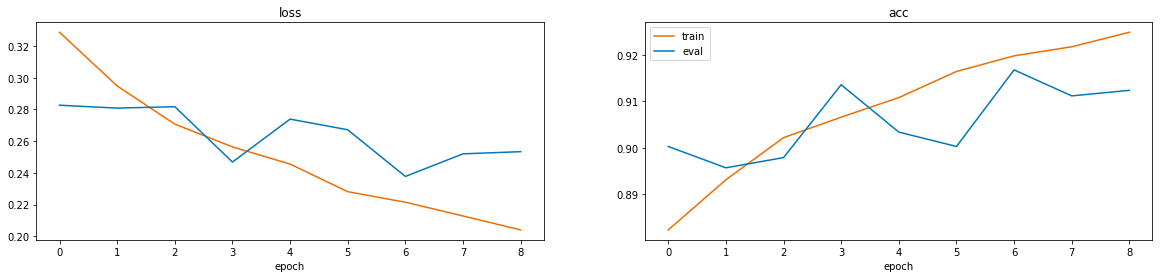

In [9]:
plotHistory(history.metrics)

# Evaluation on augmented data

## Accuracy
Test accuracy for different rotations on test data

Test acc [0.0°]:	0.912
Test acc [20.0°]:	0.776
Test acc [40.0°]:	0.529
Test acc [60.0°]:	0.409
Test acc [80.0°]:	0.328
Test acc [100.0°]:	0.276
Test acc [120.0°]:	0.245
Test acc [140.0°]:	0.229
Test acc [160.0°]:	0.213
Test acc [180.0°]:	0.215


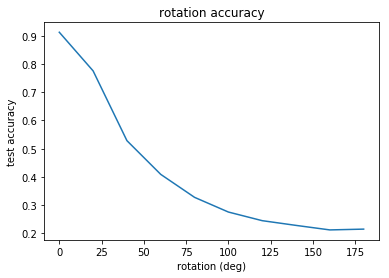

In [10]:
rotation_accuracy(model, dataGenerator, m_test=m_test, batch_size=batch_size)

## Visualization

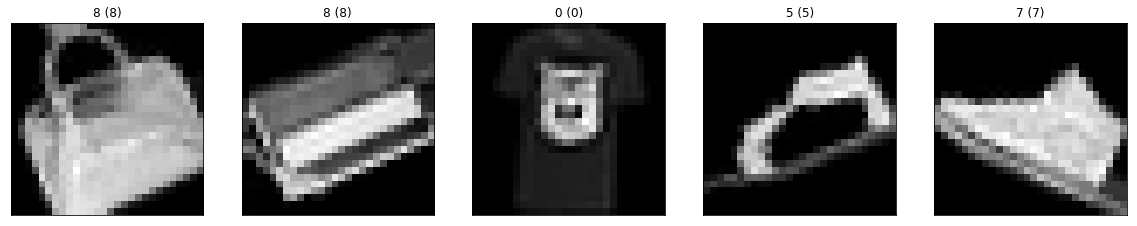

In [11]:
n_image=5
data_augmentation = {'rotation_range': 30}

# Select data
testGenerator = dataGenerator('test', batch_size=n_image, reshape=False, **data_augmentation)
images, labels = next(testGenerator)

# Run inference
predictions = model.predict(images)

# Post-process data
labels = np.argmax(labels, axis=1)
predictions = np.argmax(predictions, axis=1)
images = images.reshape((-1, 28, 28))

visualization_data(images, labels, predictions)